In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# Data Preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4]

print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [3]:
# create model
model = tf.keras.Sequential([keras.layers.Dense(units=1, 
                                                activation='sigmoid', 
                                                input_shape=[4])])

In [4]:
# compile
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, 
              loss='binary_crossentropy')

# training
batch_size = 16
epochs = 200
records = model.fit(X, y, batch_size, epochs)

Epoch 1/200
7/7 [==============================] - 0s 1ms/step - loss: 2.2410
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 1.5543
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.9611
Epoch 4/200
7/7 [==============================] - 0s 1ms/step - loss: 0.5791
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3643
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 11/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 12/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2958
Epoch 13/200
7/7 [==============================] - 0s 3ms/st

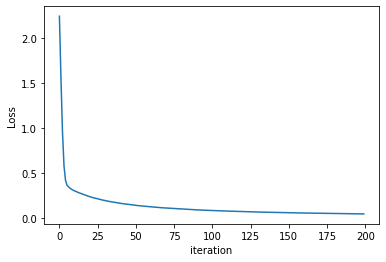

In [5]:
import matplotlib.pyplot as plt

plt.plot(records.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [6]:
print(X.shape)

(100, 4)


In [7]:
preds = model(X)
print(preds.shape)

(100, 1)


In [9]:
print(y[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.03407165],
       [0.07676861],
       [0.0455623 ],
       [0.07578772],
       [0.02851474],
       [0.03109285],
       [0.03898031],
       [0.04783496],
       [0.08659765],
       [0.07704362]], dtype=float32)>

In [10]:
preds = preds.numpy()
preds = preds.round()
preds[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [11]:
print(preds.shape)
print(y.shape)

(100, 1)
(100,)


In [12]:
acc = (preds[:,0] == y)
print(acc.mean())

1.0


In [ ]:
preds = model(X)

preds = preds.numpy()
preds = preds.round()

print(preds.shape)
print(y.shape)

acc = (preds[:,0] == y)
print(acc.mean())

In [ ]:
print(model.layers[0].weights)

In [ ]:
# initialize parameters
model.layers[0].set_weights([np.array([[-0.1]]), np.array([0.1])])

In [ ]:
import numpy as np
import tensorflow as tf

# Data Preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4]

# create model
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=[4])])


# initialize parameters
model.layers[0].set_weights([np.array([[-0.1]]), np.array([0.1])])

# declare optimization method and loss function , 
model.compile(optimizer='sgd', loss='binary_crossentropy')

# training
history = model.fit(X, y, 6, epochs=1)

# parameters after one epoch
#print('weight-bias: \n', model.layers[0].get_weights())